In [132]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

In [90]:
STATS_CSV = "Seasons_Stats.csv"
PLAYER_DATA_CSV = "player_data.csv"
#Read data
stats = pd.read_csv(STATS_CSV)
#Only keep players that have played many minutes, are in the 5 major positions
stats = stats[stats['MP'] >= 1750]
stats = stats[stats['Pos'].isin(pos)]
#Only keep useful columns
stats = stats[['Pos', 'Age', 'TS%', '3PAr', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TRB%', 'USG%', 'FG%', '3P%', '2P%', 'FT%']]
#Drop rows with missing data
stats = stats.dropna(0)

2009.0    175
1997.0    165
2014.0    163
2011.0    162
2007.0    161
         ... 
1961.0     41
1957.0     40
1956.0     39
1959.0     36
1999.0     33
Name: Year, Length: 66, dtype: int64


In [91]:
stats.shape

(5101, 14)

In [92]:
pos = ['C', 'PF', 'PG', 'SG', 'SF']
for p in pos:
    print(p + ": ", stats[stats['Pos'] == p].shape[0])

C:  722
PF:  1010
PG:  1106
SG:  1133
SF:  1130


In [94]:
#Get and normalize the features
X = stats.drop(['Pos'], axis=1)
feature_labels = X.columns
X = X.to_numpy()
#normalize(X, copy=False)
X_scaled = StandardScaler().fit(X).transform(X)

#Get and normalize the target
y = stats['Pos']
for i in range(5):
    y = y.replace(to_replace=pos[i], value=i)
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=21)

In [97]:
model = LogisticRegression(penalty='none', multi_class='multinomial', max_iter=12000)
model.fit(X_train,y_train)
acc_test = model.score(X_test, y_test)
acc_train = model.score(X_train, y_train)
print(acc_test, acc_train)

0.7102137767220903 0.7082235879426397


In [98]:
coefs = model.coef_

In [58]:
def show_weights(mat):
    for i in range(mat.shape[0]):
        print("==============================")
        print(pos[i]) #constant pos
        for j in range(mat.shape[1]):
            print(feature_labels[j], ": ", mat[i][j])

In [99]:
show_weights(coefs)

C
Age :  0.7001907842605777
TS% :  -0.09220367304846612
3PAr :  -0.3985336166857138
TRB% :  2.047005998101782
AST% :  -1.1484407336044369
STL% :  -1.2987030967233084
BLK% :  1.5602767730047862
TRB% :  2.047005998101782
USG% :  0.001011355363843865
FG% :  1.0563670377735208
3P% :  0.04549568394382882
2P% :  -0.7954875564734697
FT% :  -0.03261509600478567
PF
Age :  0.4010670335510353
TS% :  -0.17479434816663064
3PAr :  0.09861233101193555
TRB% :  1.7490207169269498
AST% :  -1.4379318295520185
STL% :  -0.6858736803345703
BLK% :  0.7670779992067883
TRB% :  1.7490207169269498
USG% :  0.3077627684850125
FG% :  0.1906128870463495
3P% :  0.1317000188258063
2P% :  0.057006320194391315
FT% :  -0.0879836990709108
PG
Age :  -0.8241555270489822
TS% :  -0.03641389476282955
3PAr :  0.8168259276343667
TRB% :  -2.4414134474631877
AST% :  3.474234985847916
STL% :  1.142507373557015
BLK% :  -2.1746366219776663
TRB% :  -2.4414134474631877
USG% :  -0.8594040055989909
FG% :  0.14903825768242682
3P% :  -0.63

In [108]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [123]:
# Try different C values if using penalty
def model_and_graph(penalty, solver, random_state, X_tr, y_tr, X_ts, y_ts, title):
    tr_acc = []
    ts_acc = []
    for c in cVals:
        model = LogisticRegression(penalty=penalty, C=c, solver=solver, random_state=random_state, multi_class='multinomial', max_iter=12000)
        model.fit(X_tr,y_tr)
        ts_acc.append(model.score(X_ts, y_ts))
        tr_acc.append(model.score(X_tr, y_tr))
    for i in range(len(cVals)):
        print("C: ", cVals[i], " Train acc: ", tr_acc[i], " Test acc: ", ts_acc[i])
    plt.plot(cVals,tr_acc,'.-')
    plt.plot(cVals,ts_acc,'.-')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.xscale('log')
    plt.title(title)
    plt.grid()
    plt.legend(['Training Accuracy', 'Test Accuracy'])
    plt.show(block=False)

C:  0.0001  Train acc:  0.22300263388937663  Test acc:  0.21852731591448932
C:  0.001  Train acc:  0.38191395961369623  Test acc:  0.3913301662707839
C:  0.01  Train acc:  0.6646180860403863  Test acc:  0.6757719714964371
C:  0.1  Train acc:  0.7073456248170911  Test acc:  0.7108076009501187
C:  1  Train acc:  0.7088088966930055  Test acc:  0.7119952494061758
C:  10  Train acc:  0.7079309335674568  Test acc:  0.7102137767220903
C:  100  Train acc:  0.7079309335674568  Test acc:  0.7102137767220903


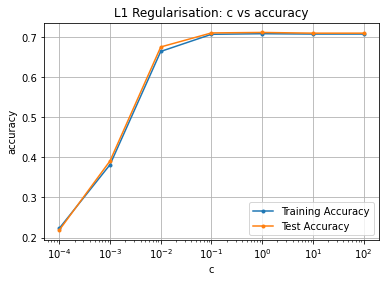

In [124]:
model_and_graph('l1','saga',21,X_train,y_train,X_test,y_test,"L1 Regularisation: c vs accuracy")

C:  0.0001  Train acc:  0.546678372841674  Test acc:  0.5534441805225653
C:  0.001  Train acc:  0.6529119110330699  Test acc:  0.6502375296912114
C:  0.01  Train acc:  0.6918349429323969  Test acc:  0.6995249406175772
C:  0.1  Train acc:  0.707638279192274  Test acc:  0.7048693586698337
C:  1  Train acc:  0.7070529704419081  Test acc:  0.7108076009501187
C:  10  Train acc:  0.7079309335674568  Test acc:  0.7102137767220903
C:  100  Train acc:  0.7082235879426397  Test acc:  0.7102137767220903


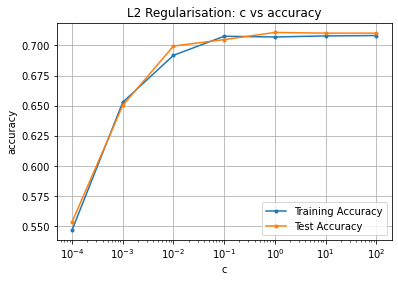

In [125]:
model_and_graph('l2','lbfgs',21,X_train,y_train,X_test,y_test,"L2 Regularisation: c vs accuracy")

# Logistic Regression Using Polynomial Feature Transformation


In [112]:
from sklearn.preprocessing import PolynomialFeatures

In [126]:
poly = PolynomialFeatures(2)

In [127]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

In [130]:
model_none = LogisticRegression(penalty='none', random_state=21, multi_class='multinomial', max_iter=12000)
model_none.fit(X_transformed_train,y_train)
acc = model_none.score(X_transformed_test, y_test)
print("Transformed, no penalty, test acc: ", acc)
acc = model_none.score(X_transformed_train, y_train)
print("Transformed, no penalty, train acc: ", acc)

Transformed, no penalty, test acc:  0.7173396674584323
Transformed, no penalty, train acc:  0.7585601404741001


C:  0.0001  Train acc:  0.22300263388937663  Test acc:  0.21852731591448932
C:  0.001  Train acc:  0.3585016095990635  Test acc:  0.37232779097387175
C:  0.01  Train acc:  0.6766169154228856  Test acc:  0.6828978622327792
C:  0.1  Train acc:  0.7287093942054433  Test acc:  0.7244655581947743
C:  1  Train acc:  0.7544629792215394  Test acc:  0.7250593824228029
C:  10  Train acc:  0.7568042142230026  Test acc:  0.7197149643705463
C:  100  Train acc:  0.7591454492244659  Test acc:  0.7209026128266033


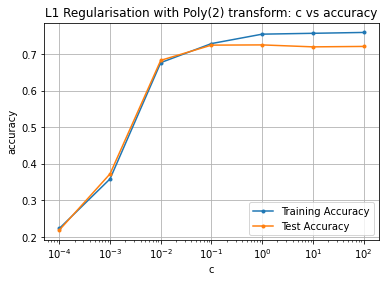

In [134]:
model_and_graph('l1','saga',21,X_transformed_train,y_train,X_transformed_test,y_test,"L1 Regularisation with Poly(2) transform: c vs accuracy")

C:  0.0001  Train acc:  0.6391571553994733  Test acc:  0.6353919239904988
C:  0.001  Train acc:  0.6927129060579456  Test acc:  0.6811163895486936
C:  0.01  Train acc:  0.7307579748317238  Test acc:  0.7262470308788599
C:  0.1  Train acc:  0.7503658179689786  Test acc:  0.7232779097387173
C:  1  Train acc:  0.7582674860989171  Test acc:  0.7232779097387173
C:  10  Train acc:  0.7609013754755634  Test acc:  0.7226840855106889
C:  100  Train acc:  0.7594381035996488  Test acc:  0.7238717339667459


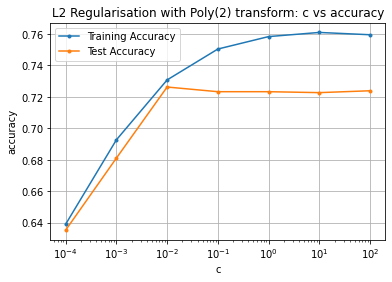

In [133]:
model_and_graph('l2','lbfgs',21,X_transformed_train,y_train,X_transformed_test,y_test,"L2 Regularisation with Poly(2) transform: c vs accuracy")

# Transform before scaling


In [135]:
Xp2 = stats.drop(['Pos'], axis=1).to_numpy()
Xp2 = poly.fit_transform(Xp2)
Xp2_scaled = StandardScaler().fit(Xp2).transform(Xp2)

#Get and normalize the target
y = stats['Pos']
for i in range(5):
    y = y.replace(to_replace=pos[i], value=i)
y = y.to_numpy()
#Y is unchanged but yea
Xp2_train, Xp2_test, yp2_train, yp2_test = train_test_split(Xp2_scaled, y, test_size=0.33, random_state=21)

In [138]:
model_none = LogisticRegression(penalty='none', random_state=21, multi_class='multinomial', max_iter=12000)
model_none.fit(Xp2_train,yp2_train)
acc = model_none.score(Xp2_test, yp2_test)
print("Transformed, no penalty, test acc: ", acc)
acc = model_none.score(Xp2_train, yp2_train)
print("Transformed, no penalty, train acc: ", acc)

Transformed, no penalty, test acc:  0.7161520190023754
Transformed, no penalty, train acc:  0.7594381035996488


c:\users\andrew qu\.virtualenvs\andrew_qu-3aprwf1j\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:  0.0001  Train acc:  0.22300263388937663  Test acc:  0.21852731591448932
C:  0.001  Train acc:  0.38191395961369623  Test acc:  0.3913301662707839
C:  0.01  Train acc:  0.672227099795142  Test acc:  0.6876484560570071
C:  0.1  Train acc:  0.7146619841966637  Test acc:  0.7143705463182898
C:  1  Train acc:  0.7272461223295288  Test acc:  0.7203087885985748
C:  10  Train acc:  0.7421714954638572  Test acc:  0.7232779097387173
C:  100  Train acc:  0.745976002341235  Test acc:  0.7220902612826603


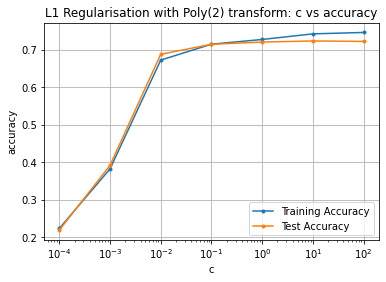

In [139]:
model_and_graph('l1','saga',21,Xp2_train,yp2_train,Xp2_test,yp2_test,"L1 Regularisation with Poly(2) transform: c vs accuracy")

C:  0.0001  Train acc:  0.6584723441615452  Test acc:  0.6538004750593824
C:  0.001  Train acc:  0.6909569798068481  Test acc:  0.6971496437054632
C:  0.01  Train acc:  0.7129060579455663  Test acc:  0.7084323040380047
C:  0.1  Train acc:  0.7213930348258707  Test acc:  0.7137767220902613
C:  1  Train acc:  0.733099209833187  Test acc:  0.7256532066508313
C:  10  Train acc:  0.7456833479660521  Test acc:  0.7244655581947743
C:  100  Train acc:  0.7568042142230026  Test acc:  0.7209026128266033


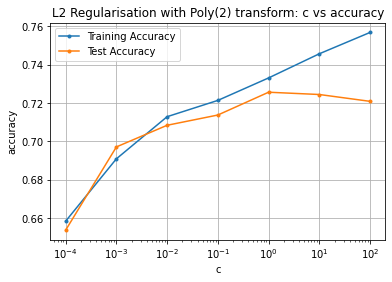

In [140]:
model_and_graph('l2','lbfgs',21,Xp2_train,yp2_train,Xp2_test,yp2_test,"L2 Regularisation with Poly(2) transform: c vs accuracy")